Data Science Tutorial source:https://code.visualstudio.com/docs/python/data-science-tutorial

About:Visualization of the  Titanic dataset available on OpenML.org, which is obtained from Vanderbilt University's Department of Biostatistics at http://biostat.mc.vanderbilt.edu/DataSets. The Titanic data provides information about the survival of passengers on the Titanic, as well as characteristics about the passengers such as age and ticket class. Using this data, the tutorial will establish a model for predicting whether a given passenger would have survived the sinking of the Titanic.

Loading the Data...

In [19]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

replacing the '?' with numpy NaN values

In [20]:
data.replace('?', np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare": np.float64})

using seaborn and matplotlib to view how certain columns of the dataset relate to survivability.

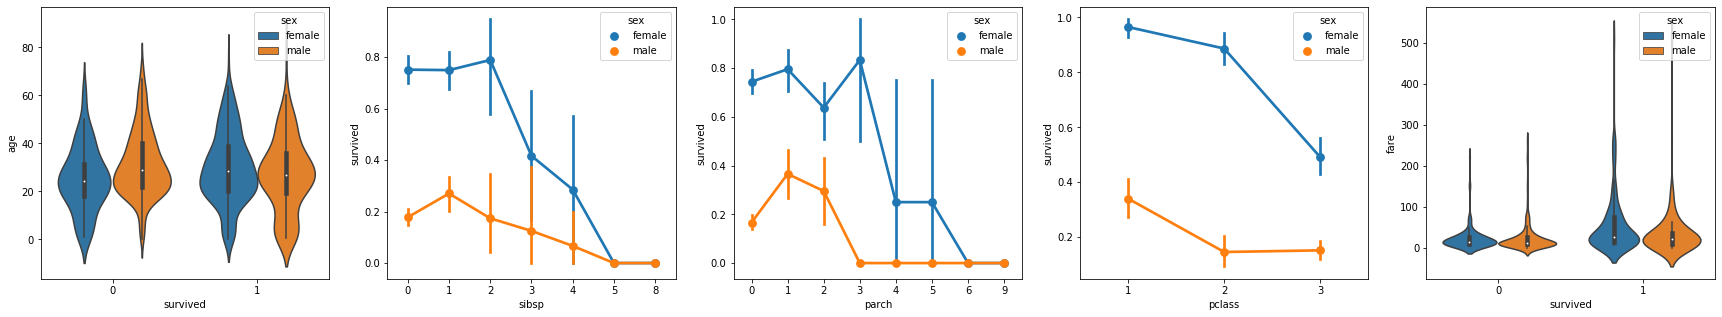

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

We can also use Pandas to see the correlations in the data for survivability but we first have to  convert the genders which are currently string values into integers

In [23]:
data.replace({'male': 1, 'female': 0}, inplace=True)

analyzing the correlation between all the input variables to identify the features that would be the best inputs to a machine learning model. The closer a value is to 1, the higher the correlation between the value and the result.

In [25]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


variables like gender have a fairly high correlation to survival, while others like relatives (sibsp = siblings or spouse, parch = parents or children) seem to have little correlation.

Let's hypothesize that sibsp and parch are related in how they affect survivability, and group them into a new column called "relatives" to see whether the combination of them has a higher correlation to survivability. To do this, you will check if for a given passenger, the number of sibsp and parch is greater than 0 and, if so, you can then say that they had a relative on board.

In [27]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


when looked at from the standpoint of whether a person had relatives, versus how many relatives, there is a higher correlation with survival. With this information in hand, you can now drop from the dataset the low value sibsp and parch columns, as well as any rows that had NaN values, to end up with a dataset that can be used for training a model.

In [28]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

Although age had a low direct correlation, it was kept because it seems reasonable that it might still have correlation in conjunction with other inputs

Part 2: Training and Evaluating the Model
how: using scikit-learn to  do preprocessing of the dataset, train a classification model to determine survivability on the Titanic, use that model with test data to determine its accuracy

    Step 1: divide the dataset into training and validation data: why to have a prtiponf for training a model and another to test the model, this is also important because then you have a way of determining how well the model would perform against the data model that it has not seen.
    -scikit-learn provides a method specifically for spliting the dataset

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

Step 2: normaliing the inputs do that all the features are treated equally

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Step 3: Using machine learning algorithm  Naïve Bayes algorithm:https://scikit-learn.org/stable/modules/naive_bayes.html for classification

-create and train the algorithm

In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Step 4: Now we have a trained model that we can use against the test data set tp predict the outcome of the test data abs calculate the accuracy of the model

In [34]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


the output above indicates that the trained algorithm had a 75 percent success rate at estimating the survival rate